In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
! pip install lime
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import mark_boundaries
import os
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np
!pip install shap
import shap

Using TensorFlow backend.


In [0]:
train_DATADIR = '/content/drive/My Drive/melSpec/Train'
validation_DATADIR = '/content/drive/My Drive/melSpec/Validation'
categories = os.listdir(train_DATADIR)

In [0]:
x_train = []
y_train = []
#i=0
for category in categories:
    path = os.path.join(train_DATADIR,category)
    for img in os.listdir(path):
      #i+=1
      #if i%100==0: print(i) 
      image_raw = load_img(os.path.join(path,img), target_size=(256, 256))
      x_train.append(img_to_array(image_raw))
      y_train.append(category)

In [0]:
x_test = []
y_test = []
for category in categories:
    path = os.path.join(validation_DATADIR,category)
    for img in os.listdir(path):
      image_raw = load_img(os.path.join(path,img), target_size=(256, 256))
      x_test.append(img_to_array(image_raw))
      y_test.append(category)

In [0]:
x_train = np.array(x_train)
x_train = x_train/255.0
x_test = np.array(x_test)
x_test=x_test/255.0

In [0]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [8]:
y_train.dtype

dtype('int64')

In [0]:
y_train = y_train.astype(np.int32)

In [0]:
y_binary = to_categorical(y_train)

In [11]:
model = Sequential()

model.add(Conv2D(256, (5, 5), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))

model.add(Conv2D(256, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))

model.add(Conv2D(256, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))

model.add(Flatten())  

model.add(Dense(64))

model.add(Dense(30))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_binary, batch_size=32, epochs=1)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
3000/3000 [==============================] - 26s 9ms/sample - loss: 3.4332 - acc: 0.0247


In [0]:
model.save('/content/drive/My Drive/model_inter.h5')

In [0]:
explainer = LimeImageExplainer()
explanation = explainer.explain_instance(x_test[0], model.predict, 
                                         top_labels=2, num_samples=100,
                                         random_seed=42)

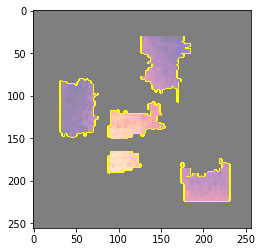

In [14]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[1], positive_only=True, num_features=5, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.savefig('/content/drive/My Drive/top_5Features-2')

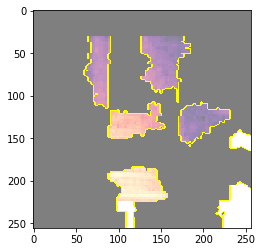

In [15]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=True)
# plot image and mask together
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.savefig('/content/drive/My Drive/top_10Features-2')